In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.svm import SVC

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/main/titanic-training-data.csv")
data.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.6500,F G63,S
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
636,637,0,3,"Leinonen, Mr. Antti Gustaf",male,32.0,0,0,STON/O 2. 3101292,7.9250,NaN,S
509,510,1,3,"Lang, Mr. Fang",male,26.0,0,0,1601,56.4958,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data=data.drop('PassengerId',axis=1)
data=data.drop('Name',axis=1)
data=data.drop('Ticket',axis=1)
data=data.drop('Fare',axis=1)
data=data.drop('Cabin',axis=1)

In [6]:
data.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Embarked     object
dtype: object

In [7]:
median1=data['Age'].median()
median1

28.0

In [8]:
data['Age'].replace(np.nan,median1,inplace=True)

In [9]:
mode1=data['Embarked'].mode().values[0]
mode1

'S'

In [10]:
data["Embarked"]=data["Embarked"].replace(np.nan,mode1)

In [11]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    0
dtype: int64

In [12]:
dummies=pd.get_dummies(data[['Embarked','Sex']])

In [13]:
columns=['Embarked','Sex']
data = pd.concat([data, dummies], axis=1)
data.drop(columns,axis=1,inplace=True)

In [14]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,0,3,22.0,1,0,0,0,1,0,1
1,1,1,38.0,1,0,1,0,0,1,0
2,1,3,26.0,0,0,0,0,1,1,0
3,1,1,35.0,1,0,0,0,1,1,0
4,0,3,35.0,0,0,0,0,1,0,1


In [15]:
duplicate=data.duplicated()
print(duplicate.sum())
data[duplicate]

313


,Survived,Pclass,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
32,1,3,28.0,0,0,0,1,0,1,0
42,0,3,28.0,0,0,1,0,0,0,1
45,0,3,28.0,0,0,0,0,1,0,1
47,1,3,28.0,0,0,0,1,0,1,0
51,0,3,21.0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
881,0,3,33.0,0,0,0,0,1,0,1
882,0,3,22.0,0,0,0,0,1,1,0
883,0,2,28.0,0,0,0,0,1,0,1
884,0,3,25.0,0,0,0,0,1,0,1


In [16]:
data.drop_duplicates(inplace=True)
dp1=data.duplicated()
dp1.sum()


0

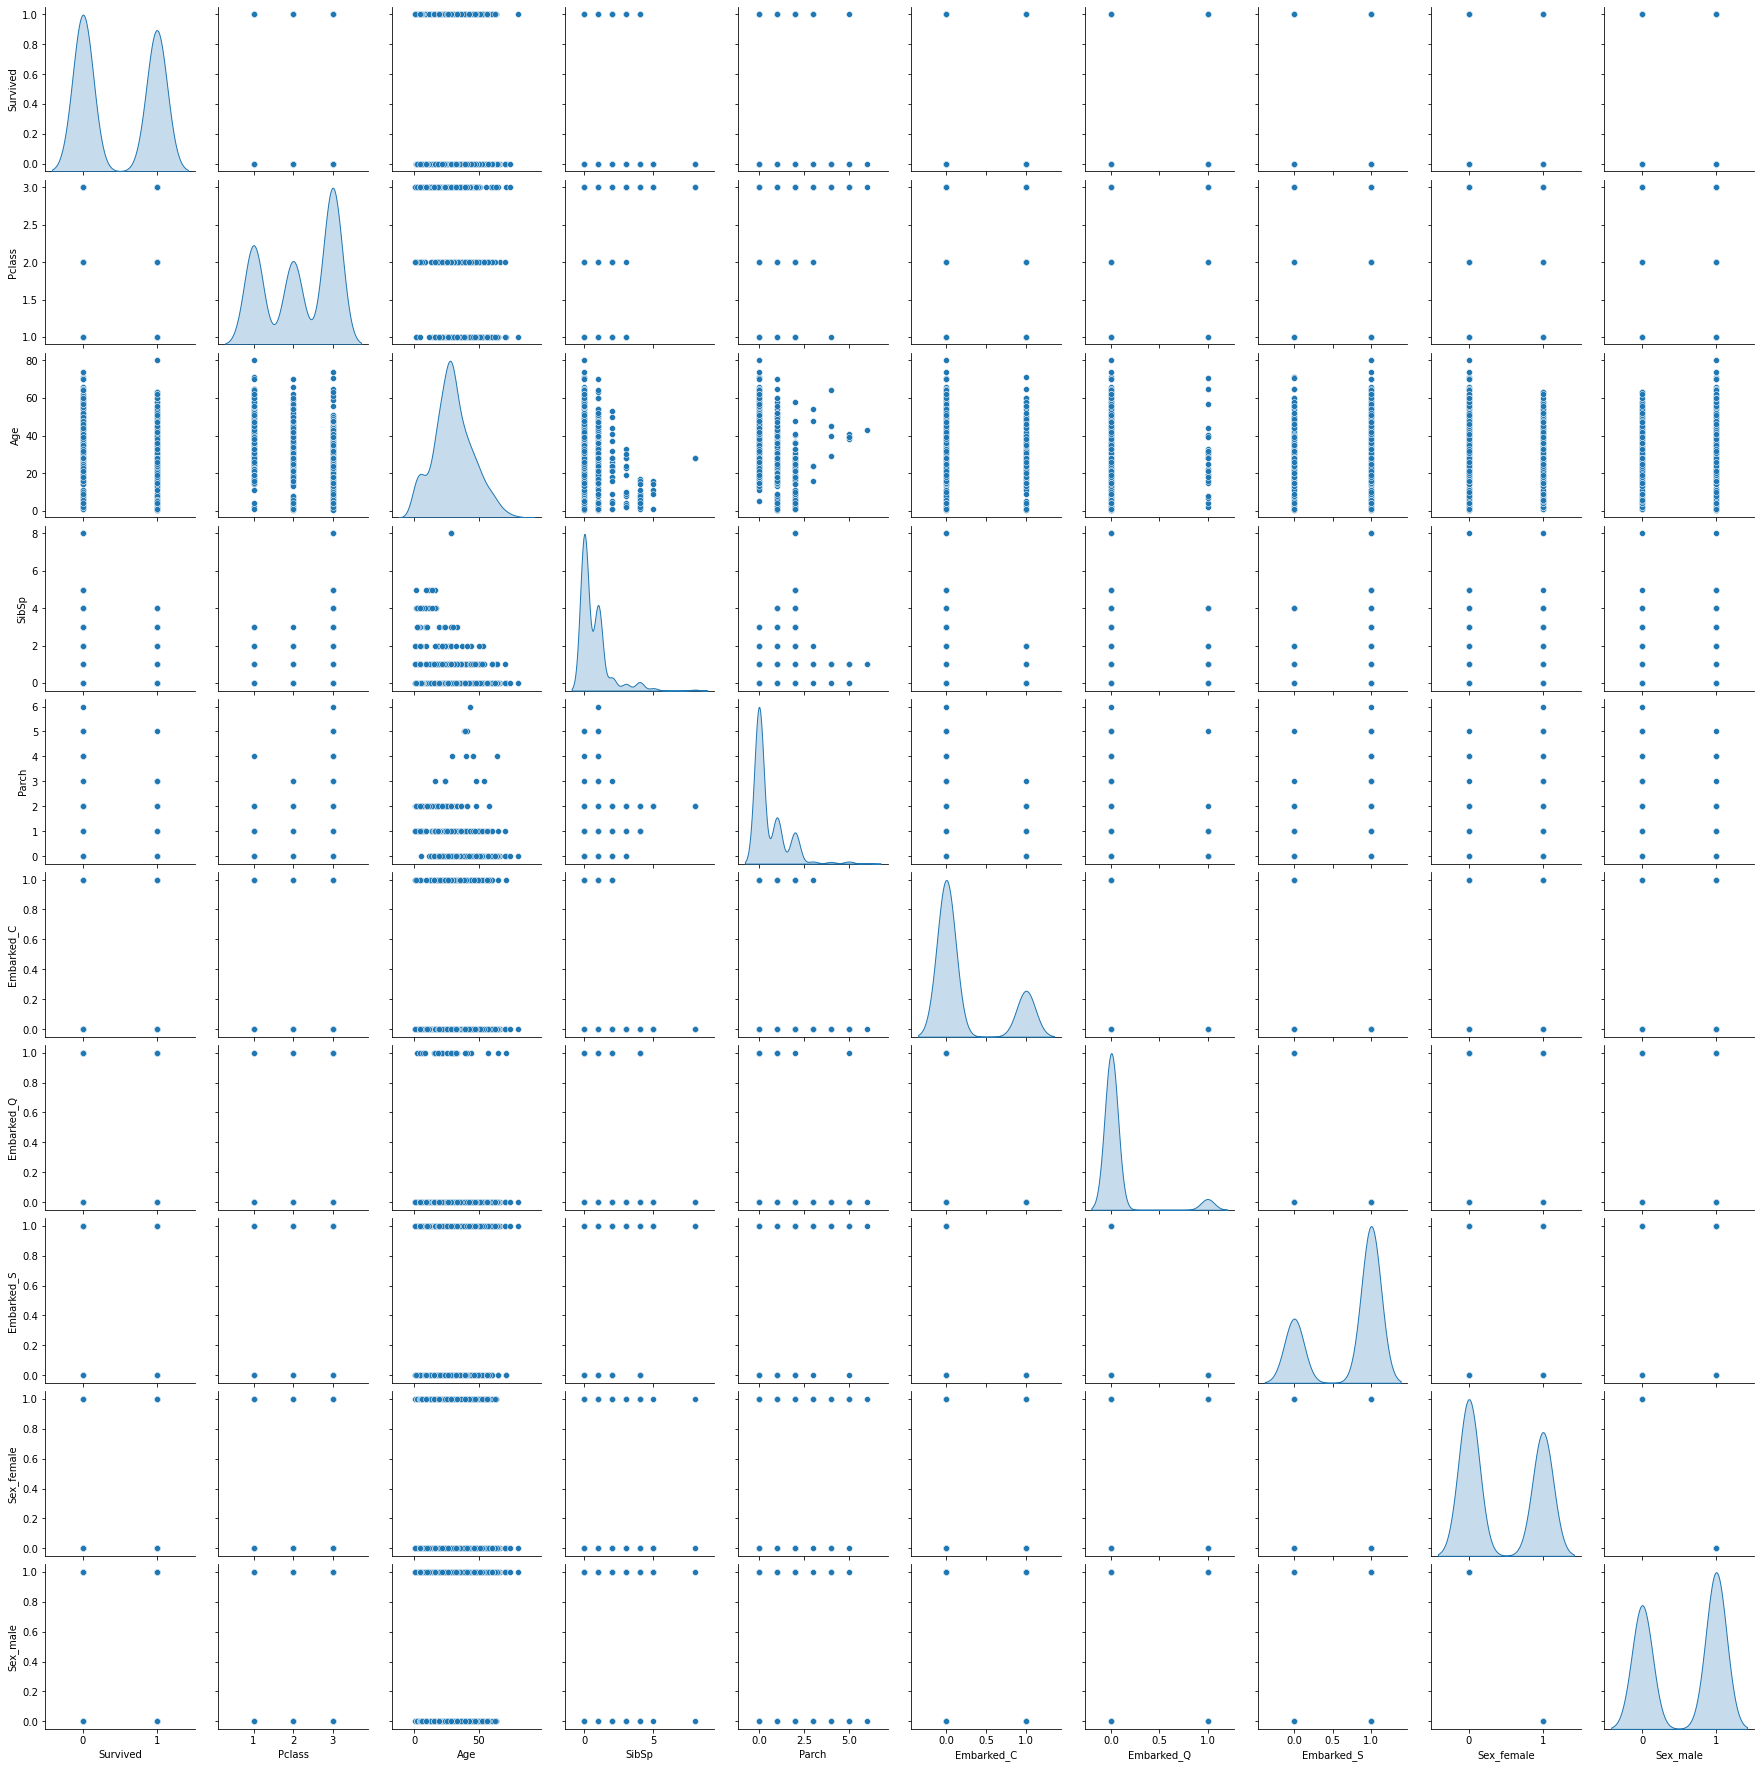

In [17]:
sns.pairplot(data,diag_kind='kde')

In [18]:
X=data.drop(['Survived'], axis=1)
y=data[['Survived']]

In [19]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.30, random_state=1)
print(y_train)


     Survived
530         1
469         1
164         0
618         1
6           0
..        ...
149         0
166         1
80          0
291         1
38          0

[404 rows x 1 columns]


### Ensemble Learning- GradientBoost

In [20]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl=GradientBoostingClassifier()
gbcl=gbcl.fit(X_train,y_train)
gbcl.score(X_train,y_train)

D:\New folder\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8712871287128713

In [21]:
gbcl.score(X_test,y_test)

0.7183908045977011

0.7183908045977011


<AxesSubplot:>

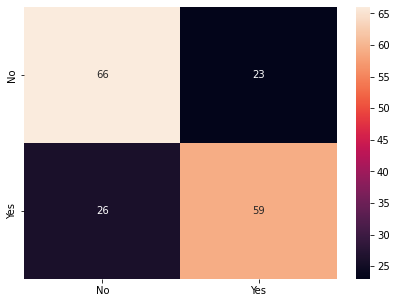

In [22]:
y_pred=gbcl.predict(X_test)
print(gbcl.score(X_test,y_test))
cm=metrics.confusion_matrix(y_test,y_pred,labels=[0,1])
df_cm=pd.DataFrame(cm,index=[i for i in['No','Yes']],columns=[i for i in['No','Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')